In [5]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("CSV/grupos_23_24.csv")

# Eliminar la columna "rango"
df = df.drop(columns=["rango"])

# Guardar el DataFrame resultante en un nuevo archivo CSV
df.to_csv("CSV_RL/grupos_23_24_sin_rango.csv", index=False)



In [6]:
df['equipo'] = df['equipo'].str.split(n=1).str[-1]

# Guardar el DataFrame resultante en un nuevo archivo CSV
df.to_csv("CSV_RL/grupos_23_24_modificado.csv", index=False)

In [7]:
df.insert(0, "SEASON", "2023-2024")

# Guardar el DataFrame con los cambios en un nuevo archivo CSV
df.to_csv("CSV_RL/grupos_temp_23_24.csv", index=False)

In [18]:
df = pd.read_csv("CSV/octavos_23_24.csv")

# Eliminar la columna "rango"
df = df.drop(columns=["rango"])
df['equipo'] = df['equipo'].str.split(n=1).str[-1]
df.insert(0, "SEASON", "2023-2024")

df.to_csv("CSV_RL/octavos_temp_23_24.csv", index=False)

In [22]:
import pandas as pd

# Cargar los datos de los archivos CSV
df_grupos = pd.read_csv('CSV_RL/grupos_temp_23_24.csv')
df_octavos = pd.read_csv('CSV_RL/octavos_temp_23_24.csv')

for index, row in df_octavos.iterrows():
    equipo = row['equipo']
    # Buscar el equipo en el DataFrame de la fase de grupos y actualizar sus estadísticas
    df_grupos.loc[df_grupos['equipo'] == equipo, ['p_jugados', 'p_ganados', 'p_empatados', 'p_perdidos',
                                                   'goles_a_favor', 'goles_en_contra', 'diferencia_de_goles',
                                                   'puntos']] += [1, row['p_ganados'], row['p_empatados'],
                                                                  row['p_perdidos'], row['goles_a_favor'],
                                                                  row['goles_en_contra'], row['diferencia_de_goles'],
                                                                  row['puntos']]


# Guardar el nuevo DataFrame en un archivo CSV
df_grupos.to_csv('CSV_RL/resultados_23_24.csv', index=False)



In [24]:
import pandas as pd

# Cargar los datos del archivo temporadas.csv
df_temporadas = pd.read_csv('CSV/temporadas.csv')

# Filtrar los datos para la temporada 2016-2017
df_temporada_2016_2017 = df_temporadas[df_temporadas['SEASON'] == '2016-2017']

# Crear un diccionario para almacenar los datos de cada equipo
equipos = {}

# Iterar sobre cada fila y contar los partidos jugados y calcular los puntos
for index, row in df_temporada_2016_2017.iterrows():
    # Contabilizar el equipo local
    equipo_local = row['HOME_TEAM']
    equipos.setdefault(equipo_local, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                      'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_local]['p_jugados'] += 1
    equipos[equipo_local]['goles_a_favor'] += row['HOME_TEAM_SCORE']
    equipos[equipo_local]['goles_en_contra'] += row['AWAY_TEAM_SCORE']
    # Calcular los puntos
    if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 3
        equipos[equipo_local]['p_ganados'] += 1
    elif row['HOME_TEAM_SCORE'] == row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 1
        equipos[equipo_local]['p_empatados'] += 1
    else:
        equipos[equipo_local]['puntos'] = 0
        equipos[equipo_local]['p_perdidos'] += 1

    # Contabilizar el equipo visitante
    equipo_visitante = row['AWAY_TEAM']
    equipos.setdefault(equipo_visitante, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                          'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_visitante]['p_jugados'] += 1
    equipos[equipo_visitante]['goles_a_favor'] += row['AWAY_TEAM_SCORE']
    equipos[equipo_visitante]['goles_en_contra'] += row['HOME_TEAM_SCORE']
    # Calcular los puntos
    if row['AWAY_TEAM_SCORE'] > row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 3
        equipos[equipo_visitante]['p_ganados'] += 1
    elif row['AWAY_TEAM_SCORE'] == row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 1
        equipos[equipo_visitante]['p_empatados'] += 1
    else:
        equipos[equipo_visitante]['puntos'] = 0
        equipos[equipo_visitante]['p_perdidos'] += 1

# Convertir el diccionario en un DataFrame
df_resultados = pd.DataFrame.from_dict(equipos, orient='index').reset_index()
df_resultados = df_resultados.rename(columns={'index': 'equipo'})

# Agregar la columna de la temporada
df_resultados['SEASON'] = '2016-2017'

# Reordenar las columnas
df_resultados = df_resultados[['SEASON', 'equipo', 'p_jugados', 'p_ganados', 'p_empatados',
                               'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'puntos']]

# Guardar el nuevo DataFrame en un nuevo archivo CSV
df_resultados.to_csv('temporadas/t_2016_2017.csv', index=False)


In [25]:

# Filtrar los datos para la temporada 2017-2018
df_temporada_2017_2018 = df_temporadas[df_temporadas['SEASON'] == '2017-2018']

# Crear un diccionario para almacenar los datos de cada equipo
equipos = {}

# Iterar sobre cada fila y contar los partidos jugados y calcular los puntos
for index, row in df_temporada_2017_2018.iterrows():
    # Contabilizar el equipo local
    equipo_local = row['HOME_TEAM']
    equipos.setdefault(equipo_local, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                      'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_local]['p_jugados'] += 1
    equipos[equipo_local]['goles_a_favor'] += row['HOME_TEAM_SCORE']
    equipos[equipo_local]['goles_en_contra'] += row['AWAY_TEAM_SCORE']
    # Calcular los puntos
    if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 3
        equipos[equipo_local]['p_ganados'] += 1
    elif row['HOME_TEAM_SCORE'] == row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 1
        equipos[equipo_local]['p_empatados'] += 1
    else:
        equipos[equipo_local]['puntos'] = 0
        equipos[equipo_local]['p_perdidos'] += 1

    # Contabilizar el equipo visitante
    equipo_visitante = row['AWAY_TEAM']
    equipos.setdefault(equipo_visitante, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                          'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_visitante]['p_jugados'] += 1
    equipos[equipo_visitante]['goles_a_favor'] += row['AWAY_TEAM_SCORE']
    equipos[equipo_visitante]['goles_en_contra'] += row['HOME_TEAM_SCORE']
    # Calcular los puntos
    if row['AWAY_TEAM_SCORE'] > row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 3
        equipos[equipo_visitante]['p_ganados'] += 1
    elif row['AWAY_TEAM_SCORE'] == row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 1
        equipos[equipo_visitante]['p_empatados'] += 1
    else:
        equipos[equipo_visitante]['puntos'] = 0
        equipos[equipo_visitante]['p_perdidos'] += 1

# Convertir el diccionario en un DataFrame
df_resultados = pd.DataFrame.from_dict(equipos, orient='index').reset_index()
df_resultados = df_resultados.rename(columns={'index': 'equipo'})

# Agregar la columna de la temporada
df_resultados['SEASON'] = '2017-2018'

# Reordenar las columnas
df_resultados = df_resultados[['SEASON', 'equipo', 'p_jugados', 'p_ganados', 'p_empatados',
                               'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'puntos']]

# Guardar el nuevo DataFrame en un nuevo archivo CSV
df_resultados.to_csv('temporadas/t_2017_2018.csv', index=False)


In [26]:
# Filtrar los datos para la temporada 2018-2019
df_temporada_2018_2019 = df_temporadas[df_temporadas['SEASON'] == '2018-2019']

# Crear un diccionario para almacenar los datos de cada equipo
equipos = {}

# Iterar sobre cada fila y contar los partidos jugados y calcular los puntos
for index, row in df_temporada_2018_2019.iterrows():
    # Contabilizar el equipo local
    equipo_local = row['HOME_TEAM']
    equipos.setdefault(equipo_local, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                      'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_local]['p_jugados'] += 1
    equipos[equipo_local]['goles_a_favor'] += row['HOME_TEAM_SCORE']
    equipos[equipo_local]['goles_en_contra'] += row['AWAY_TEAM_SCORE']
    # Calcular los puntos
    if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 3
        equipos[equipo_local]['p_ganados'] += 1
    elif row['HOME_TEAM_SCORE'] == row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 1
        equipos[equipo_local]['p_empatados'] += 1
    else:
        equipos[equipo_local]['puntos'] = 0
        equipos[equipo_local]['p_perdidos'] += 1

    # Contabilizar el equipo visitante
    equipo_visitante = row['AWAY_TEAM']
    equipos.setdefault(equipo_visitante, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                          'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_visitante]['p_jugados'] += 1
    equipos[equipo_visitante]['goles_a_favor'] += row['AWAY_TEAM_SCORE']
    equipos[equipo_visitante]['goles_en_contra'] += row['HOME_TEAM_SCORE']
    # Calcular los puntos
    if row['AWAY_TEAM_SCORE'] > row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 3
        equipos[equipo_visitante]['p_ganados'] += 1
    elif row['AWAY_TEAM_SCORE'] == row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 1
        equipos[equipo_visitante]['p_empatados'] += 1
    else:
        equipos[equipo_visitante]['puntos'] = 0
        equipos[equipo_visitante]['p_perdidos'] += 1

# Convertir el diccionario en un DataFrame
df_resultados = pd.DataFrame.from_dict(equipos, orient='index').reset_index()
df_resultados = df_resultados.rename(columns={'index': 'equipo'})

# Agregar la columna de la temporada
df_resultados['SEASON'] = '2018-2019'

# Reordenar las columnas
df_resultados = df_resultados[['SEASON', 'equipo', 'p_jugados', 'p_ganados', 'p_empatados',
                               'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'puntos']]

# Guardar el nuevo DataFrame en un nuevo archivo CSV
df_resultados.to_csv('temporadas/t_2018_2019.csv', index=False)

In [27]:
# Filtrar los datos para la temporada 2019-2020
df_temporada_2019_2020 = df_temporadas[df_temporadas['SEASON'] == '2019-2020']

# Crear un diccionario para almacenar los datos de cada equipo
equipos = {}

# Iterar sobre cada fila y contar los partidos jugados y calcular los puntos
for index, row in df_temporada_2019_2020.iterrows():
    # Contabilizar el equipo local
    equipo_local = row['HOME_TEAM']
    equipos.setdefault(equipo_local, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                      'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_local]['p_jugados'] += 1
    equipos[equipo_local]['goles_a_favor'] += row['HOME_TEAM_SCORE']
    equipos[equipo_local]['goles_en_contra'] += row['AWAY_TEAM_SCORE']
    # Calcular los puntos
    if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 3
        equipos[equipo_local]['p_ganados'] += 1
    elif row['HOME_TEAM_SCORE'] == row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 1
        equipos[equipo_local]['p_empatados'] += 1
    else:
        equipos[equipo_local]['puntos'] = 0
        equipos[equipo_local]['p_perdidos'] += 1

    # Contabilizar el equipo visitante
    equipo_visitante = row['AWAY_TEAM']
    equipos.setdefault(equipo_visitante, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                          'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_visitante]['p_jugados'] += 1
    equipos[equipo_visitante]['goles_a_favor'] += row['AWAY_TEAM_SCORE']
    equipos[equipo_visitante]['goles_en_contra'] += row['HOME_TEAM_SCORE']
    # Calcular los puntos
    if row['AWAY_TEAM_SCORE'] > row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 3
        equipos[equipo_visitante]['p_ganados'] += 1
    elif row['AWAY_TEAM_SCORE'] == row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 1
        equipos[equipo_visitante]['p_empatados'] += 1
    else:
        equipos[equipo_visitante]['puntos'] = 0
        equipos[equipo_visitante]['p_perdidos'] += 1

# Convertir el diccionario en un DataFrame
df_resultados = pd.DataFrame.from_dict(equipos, orient='index').reset_index()
df_resultados = df_resultados.rename(columns={'index': 'equipo'})

# Agregar la columna de la temporada
df_resultados['SEASON'] = '2019-2020'

# Reordenar las columnas
df_resultados = df_resultados[['SEASON', 'equipo', 'p_jugados', 'p_ganados', 'p_empatados',
                               'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'puntos']]

# Guardar el nuevo DataFrame en un nuevo archivo CSV
df_resultados.to_csv('temporadas/t_2019_2020.csv', index=False)

In [28]:
# Filtrar los datos para la temporada 2020-2021
df_temporada_2020_2021 = df_temporadas[df_temporadas['SEASON'] == '2020-2021']

# Crear un diccionario para almacenar los datos de cada equipo
equipos = {}

# Iterar sobre cada fila y contar los partidos jugados y calcular los puntos
for index, row in df_temporada_2020_2021.iterrows():
    # Contabilizar el equipo local
    equipo_local = row['HOME_TEAM']
    equipos.setdefault(equipo_local, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                      'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_local]['p_jugados'] += 1
    equipos[equipo_local]['goles_a_favor'] += row['HOME_TEAM_SCORE']
    equipos[equipo_local]['goles_en_contra'] += row['AWAY_TEAM_SCORE']
    # Calcular los puntos
    if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 3
        equipos[equipo_local]['p_ganados'] += 1
    elif row['HOME_TEAM_SCORE'] == row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 1
        equipos[equipo_local]['p_empatados'] += 1
    else:
        equipos[equipo_local]['puntos'] = 0
        equipos[equipo_local]['p_perdidos'] += 1

    # Contabilizar el equipo visitante
    equipo_visitante = row['AWAY_TEAM']
    equipos.setdefault(equipo_visitante, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                          'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_visitante]['p_jugados'] += 1
    equipos[equipo_visitante]['goles_a_favor'] += row['AWAY_TEAM_SCORE']
    equipos[equipo_visitante]['goles_en_contra'] += row['HOME_TEAM_SCORE']
    # Calcular los puntos
    if row['AWAY_TEAM_SCORE'] > row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 3
        equipos[equipo_visitante]['p_ganados'] += 1
    elif row['AWAY_TEAM_SCORE'] == row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 1
        equipos[equipo_visitante]['p_empatados'] += 1
    else:
        equipos[equipo_visitante]['puntos'] = 0
        equipos[equipo_visitante]['p_perdidos'] += 1

# Convertir el diccionario en un DataFrame
df_resultados = pd.DataFrame.from_dict(equipos, orient='index').reset_index()
df_resultados = df_resultados.rename(columns={'index': 'equipo'})

# Agregar la columna de la temporada
df_resultados['SEASON'] = '2020-2021'

# Reordenar las columnas
df_resultados = df_resultados[['SEASON', 'equipo', 'p_jugados', 'p_ganados', 'p_empatados',
                               'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'puntos']]

# Guardar el nuevo DataFrame en un nuevo archivo CSV
df_resultados.to_csv('temporadas/t_2020_2021.csv', index=False)


In [29]:
# Filtrar los datos para la temporada 2021-2022
df_temporada_2021_2022 = df_temporadas[df_temporadas['SEASON'] == '2021-2022']

# Crear un diccionario para almacenar los datos de cada equipo
equipos = {}

# Iterar sobre cada fila y contar los partidos jugados y calcular los puntos
for index, row in df_temporada_2021_2022.iterrows():
    # Contabilizar el equipo local
    equipo_local = row['HOME_TEAM']
    equipos.setdefault(equipo_local, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                      'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_local]['p_jugados'] += 1
    equipos[equipo_local]['goles_a_favor'] += row['HOME_TEAM_SCORE']
    equipos[equipo_local]['goles_en_contra'] += row['AWAY_TEAM_SCORE']
    # Calcular los puntos
    if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 3
        equipos[equipo_local]['p_ganados'] += 1
    elif row['HOME_TEAM_SCORE'] == row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 1
        equipos[equipo_local]['p_empatados'] += 1
    else:
        equipos[equipo_local]['puntos'] = 0
        equipos[equipo_local]['p_perdidos'] += 1

    # Contabilizar el equipo visitante
    equipo_visitante = row['AWAY_TEAM']
    equipos.setdefault(equipo_visitante, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                          'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_visitante]['p_jugados'] += 1
    equipos[equipo_visitante]['goles_a_favor'] += row['AWAY_TEAM_SCORE']
    equipos[equipo_visitante]['goles_en_contra'] += row['HOME_TEAM_SCORE']
    # Calcular los puntos
    if row['AWAY_TEAM_SCORE'] > row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 3
        equipos[equipo_visitante]['p_ganados'] += 1
    elif row['AWAY_TEAM_SCORE'] == row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 1
        equipos[equipo_visitante]['p_empatados'] += 1
    else:
        equipos[equipo_visitante]['puntos'] = 0
        equipos[equipo_visitante]['p_perdidos'] += 1

# Convertir el diccionario en un DataFrame
df_resultados = pd.DataFrame.from_dict(equipos, orient='index').reset_index()
df_resultados = df_resultados.rename(columns={'index': 'equipo'})

# Agregar la columna de la temporada
df_resultados['SEASON'] = '2021-2022'

# Reordenar las columnas
df_resultados = df_resultados[['SEASON', 'equipo', 'p_jugados', 'p_ganados', 'p_empatados',
                               'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'puntos']]

# Guardar el nuevo DataFrame en un nuevo archivo CSV
df_resultados.to_csv('temporadas/t_2021_2022.csv', index=False)


In [30]:
# Filtrar los datos para la temporada 2022-2023
df_temporada_2022_2023 = df_temporadas[df_temporadas['SEASON'] == '2022-2023']

# Crear un diccionario para almacenar los datos de cada equipo
equipos = {}

# Iterar sobre cada fila y contar los partidos jugados y calcular los puntos
for index, row in df_temporada_2022_2023.iterrows():
    # Contabilizar el equipo local
    equipo_local = row['HOME_TEAM']
    equipos.setdefault(equipo_local, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                      'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_local]['p_jugados'] += 1
    equipos[equipo_local]['goles_a_favor'] += row['HOME_TEAM_SCORE']
    equipos[equipo_local]['goles_en_contra'] += row['AWAY_TEAM_SCORE']
    # Calcular los puntos
    if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 3
        equipos[equipo_local]['p_ganados'] += 1
    elif row['HOME_TEAM_SCORE'] == row['AWAY_TEAM_SCORE']:
        equipos[equipo_local]['puntos'] = 1
        equipos[equipo_local]['p_empatados'] += 1
    else:
        equipos[equipo_local]['puntos'] = 0
        equipos[equipo_local]['p_perdidos'] += 1

    # Contabilizar el equipo visitante
    equipo_visitante = row['AWAY_TEAM']
    equipos.setdefault(equipo_visitante, {'p_jugados': 0, 'p_ganados': 0, 'p_empatados': 0, 'p_perdidos': 0,
                                          'goles_a_favor': 0, 'goles_en_contra': 0})
    equipos[equipo_visitante]['p_jugados'] += 1
    equipos[equipo_visitante]['goles_a_favor'] += row['AWAY_TEAM_SCORE']
    equipos[equipo_visitante]['goles_en_contra'] += row['HOME_TEAM_SCORE']
    # Calcular los puntos
    if row['AWAY_TEAM_SCORE'] > row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 3
        equipos[equipo_visitante]['p_ganados'] += 1
    elif row['AWAY_TEAM_SCORE'] == row['HOME_TEAM_SCORE']:
        equipos[equipo_visitante]['puntos'] = 1
        equipos[equipo_visitante]['p_empatados'] += 1
    else:
        equipos[equipo_visitante]['puntos'] = 0
        equipos[equipo_visitante]['p_perdidos'] += 1

# Convertir el diccionario en un DataFrame
df_resultados = pd.DataFrame.from_dict(equipos, orient='index').reset_index()
df_resultados = df_resultados.rename(columns={'index': 'equipo'})

# Agregar la columna de la temporada
df_resultados['SEASON'] = '2022-2023'

# Reordenar las columnas
df_resultados = df_resultados[['SEASON', 'equipo', 'p_jugados', 'p_ganados', 'p_empatados',
                               'p_perdidos', 'goles_a_favor', 'goles_en_contra', 'puntos']]

# Guardar el nuevo DataFrame en un nuevo archivo CSV
df_resultados.to_csv('temporadas/t_2022_2023.csv', index=False)


In [32]:
# Lista con los nombres de los archivos CSV
archivos_csv = ['temporadas/t_2016_2017.csv', 'temporadas/t_2017_2018.csv', 'temporadas/t_2018_2019.csv',
                'temporadas/t_2019_2020.csv', 'temporadas/t_2020_2021.csv', 'temporadas/t_2021_2022.csv',
                'temporadas/t_2022_2023.csv']

# Leer los archivos CSV y almacenarlos en una lista
dfs = [pd.read_csv(archivo) for archivo in archivos_csv]

# Concatenar los DataFrames en uno solo
df_global_temp = pd.concat(dfs, ignore_index=True)

# Eliminar la columna "puntos"
df_global_temp = df_global_temp.drop(columns=['puntos'])

# Guardar el DataFrame combinado en un nuevo archivo CSV
df_global_temp.to_csv('temporadas/global_temp_sin_23_24.csv', index=False)

In [33]:

# Cargar el archivo CSV
df_global_temp_sin_23_24 = pd.read_csv('temporadas/global_temp_sin_23_24.csv')

# Calcular los puntos
df_global_temp_sin_23_24['puntos'] = df_global_temp_sin_23_24['p_ganados'] * 3 + df_global_temp_sin_23_24['p_empatados'] * 1 + df_global_temp_sin_23_24['p_perdidos'] * 0

# Guardar el DataFrame actualizado en un nuevo archivo CSV
df_global_temp_sin_23_24.to_csv('temporadas/global_temp_con_puntos.csv', index=False)


In [35]:
# Cargar el archivo CSV
df_resultados_23_24 = pd.read_csv('CSV_RL/resultados_23_24.csv')

# Eliminar la columna 'diferencia_de_goles'
df_resultados_23_24 = df_resultados_23_24.drop(columns=['diferencia_de_goles'])

# Guardar el DataFrame modificado en el mismo archivo CSV
df_resultados_23_24.to_csv('CSV_RL/resultados_23_24.csv', index=False)

In [36]:
# Cargar el archivo CSV
df_octavos_23_24 = pd.read_csv('CSV_RL/octavos_temp_23_24.csv')

# Eliminar la columna 'diferencia_de_goles'
df_octavos_23_24 = df_octavos_23_24.drop(columns=['diferencia_de_goles'])

# Guardar el DataFrame modificado en el mismo archivo CSV
df_octavos_23_24.to_csv('CSV_RL/octavos_temp_23_24.csv', index=False)

In [38]:
import pandas as pd

# Cargar los archivos CSV
df_resultados_23_24 = pd.read_csv('CSV_RL/resultados_23_24.csv')
df_octavos_temp_23_24 = pd.read_csv('CSV_RL/octavos_temp_23_24.csv')

# Iterar sobre cada fila del DataFrame resultados_23_24
for index, row in df_resultados_23_24.iterrows():
    # Buscar coincidencia en el DataFrame octavos_temp_23_24
    mask = (df_octavos_temp_23_24['equipo'] == row['equipo']) & (df_octavos_temp_23_24['SEASON'] == row['SEASON'])
    equipo_coincidente = df_octavos_temp_23_24[mask]
    if not equipo_coincidente.empty:
        # Actualizar los datos en el DataFrame resultados_23_24
        df_resultados_23_24.at[index, 'p_ganados'] = equipo_coincidente['p_ganados'].values[0]
        df_resultados_23_24.at[index, 'p_empatados'] = equipo_coincidente['p_empatados'].values[0]
        df_resultados_23_24.at[index, 'p_perdidos'] = equipo_coincidente['p_perdidos'].values[0]
        df_resultados_23_24.at[index, 'goles_a_favor'] = equipo_coincidente['goles_a_favor'].values[0]
        df_resultados_23_24.at[index, 'goles_en_contra'] = equipo_coincidente['goles_en_contra'].values[0]
        df_resultados_23_24.at[index, 'puntos'] = equipo_coincidente['puntos'].values[0]

# Guardar el DataFrame modificado en el mismo archivo CSV
df_resultados_23_24.to_csv('CSV_RL/resultados_23_24.csv', index=False)


In [40]:
# Cargar los archivos CSV
df_resultados = pd.read_csv('CSV_RL/resultados_23_24.csv')
df_global_temp_con_puntos = pd.read_csv('temporadas/global_temp_con_puntos.csv')

# Concatenar los DataFrames
df_todos = pd.concat([df_resultados, df_global_temp_con_puntos])

# Ordenar por temporadas de manera ascendente
df_todos = df_todos.sort_values(by='SEASON')

# Guardar el DataFrame combinado en un nuevo archivo CSV
df_todos.to_csv('CSV_RL/todos.csv', index=False)


REGRESIÓN LINEAL


Para predecir el ganador de la Champions League de la temporada 2023-2024 usando regresión lineal, podríamos considerar los puntos como variable dependiente y las demás métricas (partidos ganados, empatados, perdidos, goles a favor, y goles en contra) como variables independientes.

En este caso vamos a utilizar la regresión lineal para precedir el número de puntos que podría llegar a tener cada equipo. Posteriormente haremos una clasificación, sugiriendo así cuál tiene mayores posibilidades de ganar basándonos en su rendimiento proyectado.


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [50]:
df_todos = pd.read_csv('CSV_RL/todos.csv')
df_todos.info()
df_todos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEASON           256 non-null    object
 1   equipo           256 non-null    object
 2   p_jugados        256 non-null    int64 
 3   p_ganados        256 non-null    int64 
 4   p_empatados      256 non-null    int64 
 5   p_perdidos       256 non-null    int64 
 6   goles_a_favor    256 non-null    int64 
 7   goles_en_contra  256 non-null    int64 
 8   puntos           256 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 18.1+ KB


,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,puntos
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,7.601562,2.992188,1.617188,2.992188,11.566406,11.566406,10.593750
std,2.082004,2.518936,1.155523,1.310567,7.795140,3.892109,7.652694
min,6.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,6.000000,1.000000,1.000000,2.000000,6.000000,9.000000,4.000000
50%,6.500000,2.000000,2.000000,3.000000,10.000000,12.000000,9.000000
75%,8.000000,5.000000,2.000000,4.000000,15.000000,14.000000,15.000000
max,13.000000,11.000000,6.000000,6.000000,43.000000,24.000000,34.000000


In [51]:
matriz = df_todos.corr()
matriz


,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,puntos
p_jugados,1.000000,0.879515,0.231390,-0.305833,0.825118,-0.000110,0.903434
p_ganados,0.879515,1.000000,0.007052,-0.531014,0.884980,-0.230346,0.988535
p_empatados,0.231390,0.007052,1.000000,-0.527659,0.110369,-0.124247,0.157959
p_perdidos,-0.305833,-0.531014,-0.527659,1.000000,-0.487456,0.552103,-0.604035
goles_a_favor,0.825118,0.884980,0.110369,-0.487456,1.000000,-0.032331,0.890557
goles_en_contra,-0.000110,-0.230346,-0.124247,0.552103,-0.032331,1.000000,-0.246220
puntos,0.903434,0.988535,0.157959,-0.604035,0.890557,-0.246220,1.000000


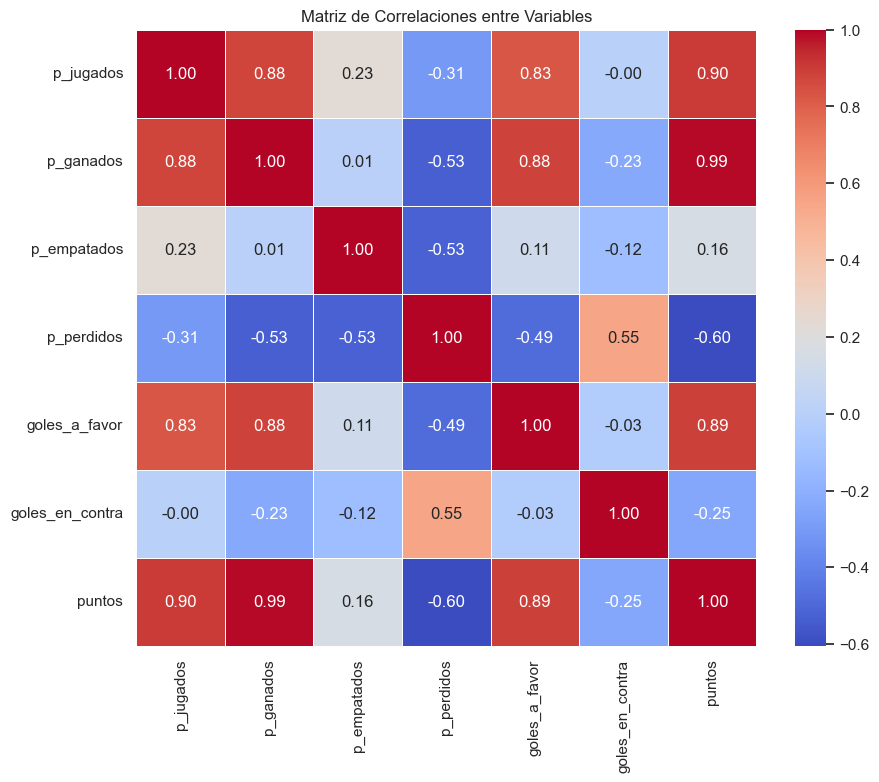

In [52]:
# Generar una gráfica visual de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
plt.title('Matriz de Correlaciones entre Variables')
plt.show()

La matriz de correlaciones revela varias relaciones interesantes entre las variables:

Partidos ganados (p_ganados) y puntos: Hay una correlación muy alta (0.99), lo que indica que, como se esperaría, el número de partidos ganados tiene una influencia significativa en los puntos acumulados por un equipo.

Partidos jugados (p_jugados) y puntos: También muestra una correlación fuerte (0.90), lo que sugiere que cuantos más partidos juega un equipo, más puntos tiene la oportunidad de acumular, aunque esta relación es en parte inherente a la estructura de la competición.

Partidos perdidos (p_perdidos) y puntos: La correlación es negativamente fuerte (-0.60), lo cual es lógico ya que perder partidos directamente disminuye la cantidad de puntos que un equipo puede acumular.

Goles a favor (goles_a_favor) y puntos: Existe una correlación positiva fuerte (0.89), indicando que los equipos que marcan más goles tienden a acumular más puntos.

Goles en contra (goles_en_contra) y puntos: La correlación es negativa (-0.25), aunque no tan fuerte como otras, sugiere que recibir más goles puede impactar negativamente en los puntos, pero no es tan determinante como los goles marcados o los partidos ganados.

Dado este análisis, parece razonable incluir partidos ganados, partidos perdidos, y goles a favor como variables principales en nuestro modelo de regresión para predecir los puntos de un equipo.

In [54]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df_todos[['p_ganados', 'p_perdidos', 'goles_a_favor']]
y = df_todos['puntos']

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular y mostrar el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mse, r2)

(0.4621706655350529, 0.9929892431132372)

Error Cuadrático Medio (MSE): 0.46, lo cual es relativamente bajo, indicando que las predicciones del modelo se desvían en promedio aproximadamente 0.678 puntos (la raíz cuadrada del MSE) de los valores reales.

Coeficiente de Determinación (R^2): 0.992, muy cercano a 1, lo que sugiere que el modelo puede explicar aproximadamente el 99.2% de la variabilidad en los puntos acumulados por los equipos, basándose en los partidos ganados, los partidos perdidos, y los goles a favor.

Estos resultados indican que el modelo es bastante efectivo para predecir los puntos de un equipo en la Champions League basándose en las variables seleccionadas.

Ahora nos centraremos en los equipos que actualmente están en octavos.

In [55]:
df_8 = pd.read_csv('CSV_RL/octavos_temp_23_24.csv')
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SEASON           16 non-null     object
 1   equipo           16 non-null     object
 2   p_jugados        16 non-null     int64 
 3   p_ganados        16 non-null     int64 
 4   p_empatados      16 non-null     int64 
 5   p_perdidos       16 non-null     int64 
 6   goles_a_favor    16 non-null     int64 
 7   goles_en_contra  16 non-null     int64 
 8   puntos           16 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.2+ KB


In [57]:
X_octavos = df_8[['p_ganados', 'p_perdidos', 'goles_a_favor']]

puntos_pred_octavos = modelo.predict(X_octavos)
df_8['puntos_pred'] = puntos_pred_octavos

df_8[['equipo', 'puntos', 'puntos_pred']].sort_values(by='puntos_pred', ascending=False)



,equipo,puntos,puntos_pred
0,Manchester City,21,23.797634
1,Real Madrid,21,23.574037
2,Bayern Munich,16,17.294875
3,Porto,15,16.898726
4,Inter,15,15.056964
5,Atlético Madrid,14,14.884411
6,Arsenal,13,14.208766
7,Barcelona,13,14.041068
8,Lazio,13,13.761572
11,RB Leipzig,12,13.421322


% actualmente en base a los resultados obtenidos en esta temporada:

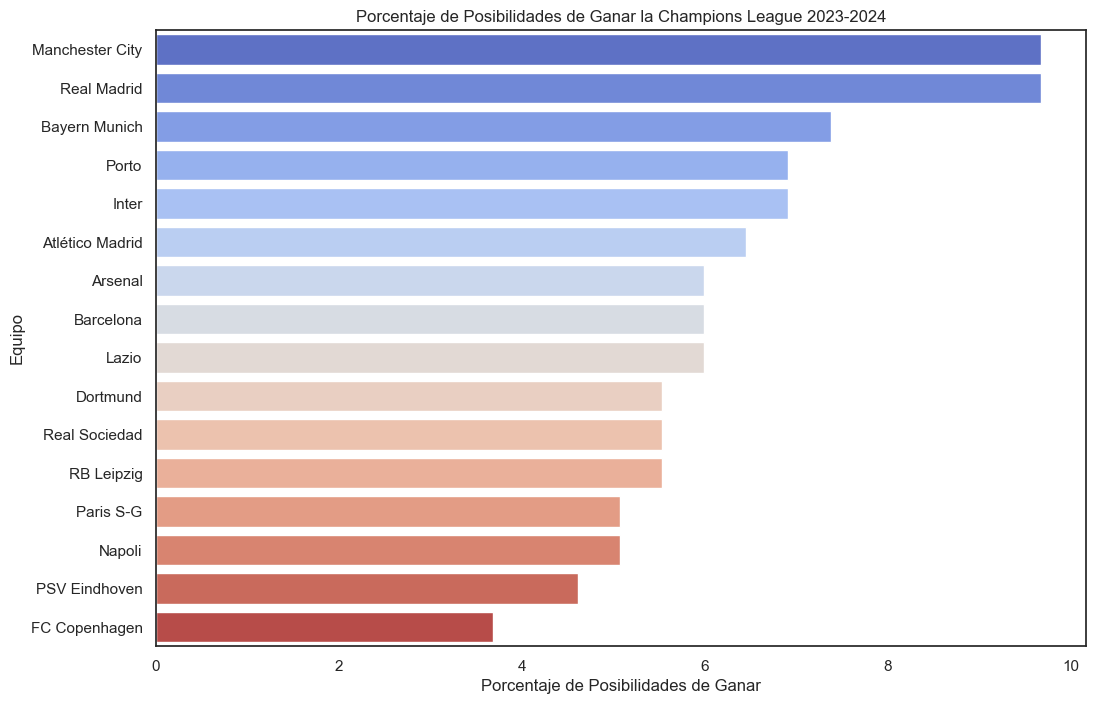

,equipo,porcentaje_posibilidades_ganar
0,Manchester City,9.677419
1,Real Madrid,9.677419
2,Bayern Munich,7.373272
3,Porto,6.912442
4,Inter,6.912442
5,Atlético Madrid,6.451613
6,Arsenal,5.990783
7,Barcelona,5.990783
8,Lazio,5.990783
9,Dortmund,5.529954


In [60]:
# Calcular el total de puntos proyectados de todos los equipos en octavos
total_puntos_proyectados = df_8['puntos'].sum()

# Calcular el porcentaje de posibilidades de ganar para cada equipo
df_8['porcentaje_posibilidades_ganar'] = (df_8['puntos'] / total_puntos_proyectados) * 100

# Ordenar los equipos por su porcentaje de posibilidades de ganar
ranking_porcentaje = df_8[['equipo', 'porcentaje_posibilidades_ganar']].sort_values(by='porcentaje_posibilidades_ganar', ascending=False)

# Visualización del ranking
plt.figure(figsize=(12, 8))
sns.barplot(x='porcentaje_posibilidades_ganar', y='equipo', data=ranking_porcentaje, palette='coolwarm')
plt.title('Porcentaje de Posibilidades de Ganar la Champions League 2023-2024')
plt.xlabel('Porcentaje de Posibilidades de Ganar')
plt.ylabel('Equipo')
plt.show()

ranking_porcentaje



Vamos a estudiar los puntos y goles por partidos de esos 16 equipos:


In [80]:
champions_league = pd.read_csv('CSV/champions_league.csv')
todos = pd.read_csv('CSV_RL/todos.csv')

In [69]:
# Diccionario de equivalencias
equivalencias = {
    'Manchester City': ['eng Manchester City', 'Manchester City', 'Manchester City FC'],
    'Real Madrid': ['es Real Madrid', 'Real Madrid', 'Real Madrid FC'],
    'Bayern Munich': ['de Bayern Munich', 'Bayern München', 'Bayern Munich'],
    'Porto': ['pt Porto', 'FC Porto', 'Porto'],
    'Inter': ['it Inter', 'Inter', 'Internazionale'],
    'Atlético Madrid': ['es Atlético Madrid', 'Atlético Madrid', 'Atlético Madrid'],
    'Arsenal': ['eng Arsenal', 'Arsenal FC', 'Arsenal'],
    'Barcelona': ['es Barcelona', 'FC Barcelona', 'Barcelona'],
    'Lazio': ['it Lazio', 'Lazio Roma', 'Società Sportiva Lazio'],
    'Dortmund': ['de Dortmund', 'Borussia Dortmund', 'Dortmund'],
    'Real Sociedad': ['es Real Sociedad', 'Real Sociedad de Futbol', 'Real Sociedad'],
    'RB Leipzig': ['de RB Leipzig', 'RB Leipzig', 'Leipzig'],
    'Paris Saint-Germain': ['fr Paris S-G', 'Paris Saint-Germain', 'Paris Saint-Germain'],
    'Napoli': ['it Napoli', 'SSC Napoli', 'Napoli'],
    'PSV Eindhoven': ['nl PSV Eindhoven', 'PSV Eindhoven', 'Eindhoven'],
    'FC Copenhagen': ['dk FC Copenhagen', 'FC København', 'Copenhagen']
}

# Invertir el diccionario de equivalencias para mapeo directo
equivalencias_invertidas = {}
for equipo_estandar, lista_nombres in equivalencias.items():
    for nombre in lista_nombres:
        equivalencias_invertidas[nombre] = equipo_estandar



In [71]:
todos['equipo_normalizado'] = todos['equipo'].map(equivalencias_invertidas).fillna(todos['equipo'])

# Filtrar los datos para incluir solo los 16 equipos que están en los octavos de final
equipos_octavos = [
    "Manchester City", "Real Madrid", "Bayern Munich", "Porto",
    "Inter", "Atlético Madrid", "Arsenal", "Barcelona",
    "Lazio", "Dortmund", "Real Sociedad", "RB Leipzig",
    "Paris Saint-Germain", "Napoli", "PSV Eindhoven", "FC Copenhagen"
]

datos_equipos_octavos = todos[todos['equipo_normalizado'].isin(equipos_octavos)]

# Agrupar los datos por el equipo normalizado y calcular el rendimiento
analisis_octavos_normalizado = datos_equipos_octavos.groupby('equipo_normalizado').agg({
    'p_jugados': 'sum',
    'p_ganados': 'sum',
    'p_empatados': 'sum',
    'p_perdidos': 'sum',
    'goles_a_favor': 'sum',
    'goles_en_contra': 'sum',
    'puntos': 'sum'
}).reset_index()

# Calcular puntos por partido y goles por partido para cada equipo
analisis_octavos_normalizado['puntos_por_partido'] = analisis_octavos_normalizado['puntos'] / analisis_octavos_normalizado['p_jugados']
analisis_octavos_normalizado['goles_por_partido'] = analisis_octavos_normalizado['goles_a_favor'] / analisis_octavos_normalizado['p_jugados']

# Ordenar los equipos por puntos por partido y goles por partido para determinar los 4 mejores
analisis_octavos_normalizado = analisis_octavos_normalizado.sort_values(by=['puntos_por_partido', 'goles_por_partido'], ascending=False)

analisis_octavos_normalizado.head(16)

,equipo_normalizado,p_jugados,p_ganados,p_empatados,p_perdidos,goles_a_favor,goles_en_contra,puntos,puntos_por_partido,goles_por_partido
3,Bayern Munich,78,57,10,11,204,72,181,2.320513,2.615385
8,Manchester City,82,55,14,13,196,83,179,2.182927,2.390244
14,Real Madrid,86,56,12,18,191,104,180,2.093023,2.220930
2,Barcelona,68,38,14,16,129,80,128,1.882353,1.897059
11,Paris Saint-Germain,63,35,11,17,143,76,116,1.841270,2.269841
0,Arsenal,15,8,3,4,36,21,27,1.800000,2.400000
15,Real Sociedad,7,3,3,1,7,4,12,1.714286,1.000000
1,Atlético Madrid,60,28,16,16,77,59,100,1.666667,1.283333
12,Porto,57,28,9,20,91,72,93,1.631579,1.596491
9,Napoli,45,20,12,13,81,56,72,1.600000,1.800000


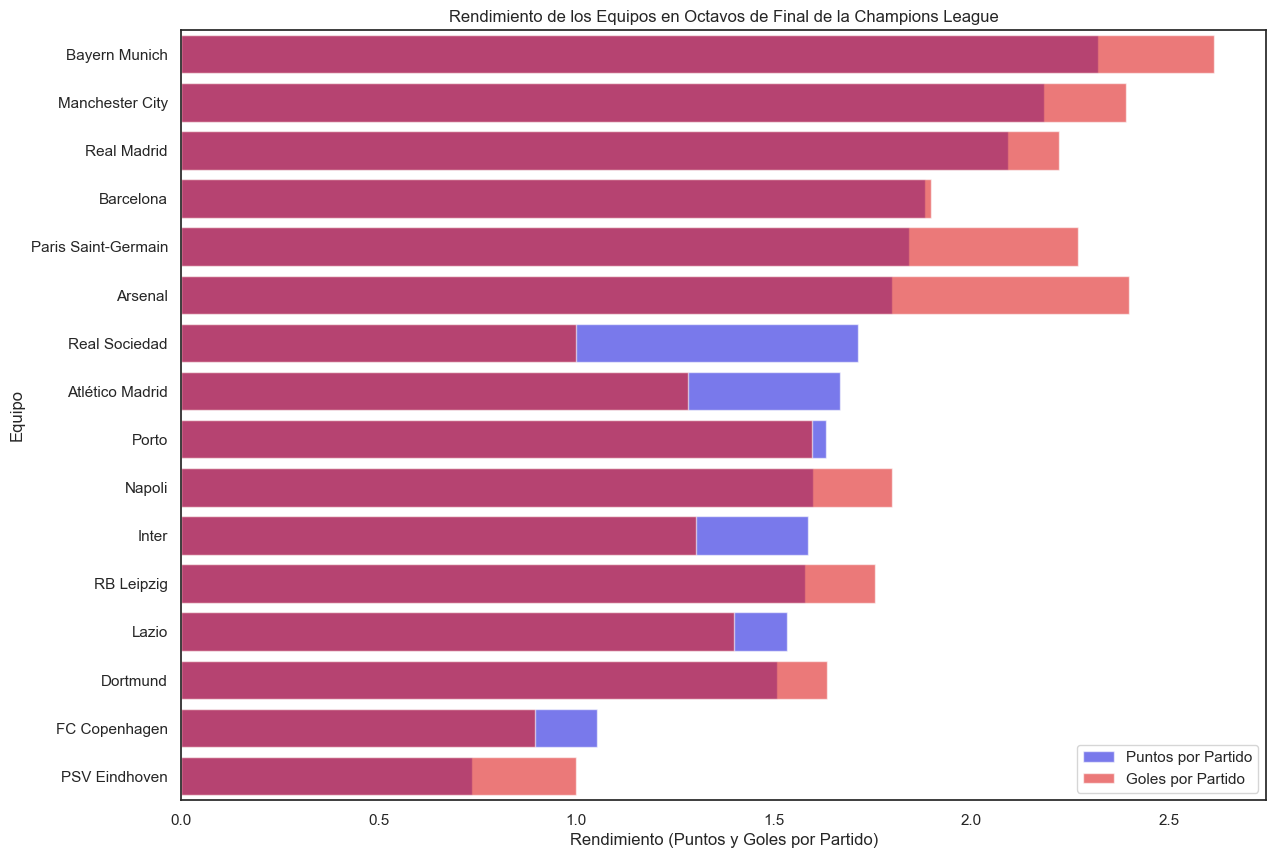

In [74]:
# Visualización del rendimiento de los 16 equipos en octavos de final
plt.figure(figsize=(14, 10))

# Gráfica de barras para puntos por partido
sns.barplot(x='puntos_por_partido', y='equipo_normalizado', data=analisis_octavos_normalizado,
            label='Puntos por Partido', color='blue', alpha=0.6, order=analisis_octavos_normalizado.sort_values('puntos_por_partido', ascending=False)['equipo_normalizado'])

# Gráfica de barras para goles por partido (superpuesta)
sns.barplot(x='goles_por_partido', y='equipo_normalizado', data=analisis_octavos_normalizado,
            label='Goles por Partido', color='red', alpha=0.6, order=analisis_octavos_normalizado.sort_values('puntos_por_partido', ascending=False)['equipo_normalizado'])

plt.xlabel('Rendimiento (Puntos y Goles por Partido)')
plt.ylabel('Equipo')
plt.title('Rendimiento de los Equipos en Octavos de Final de la Champions League')
plt.legend(loc='lower right')

plt.show()


Este análisis detallado para los 16 equipos en los octavos de final muestra la clasificación basada en el rendimiento histórico y actual, con Bayern Munich, Manchester City y Real Madrid liderando tanto en puntos por partido como en goles por partido. Estos indicadores sugieren que estos equipos podrían tener las mayores posibilidades de éxito en las etapas restantes de la competición.

Ahora vamos a centrarnos en los 8 equipos que, según los resultados en esta temporada 23-24, tienen más posibilidades de pasar a cuartos.

In [75]:
# Lista de enfrentamientos de octavos de final
enfrentamientos_octavos = [
    ("Porto", "Arsenal"),
    ("Napoli", "Barcelona"),
    ("Paris S-G", "Real Sociedad"),
    ("Inter", "Atlético Madrid"),
    ("PSV Eindhoven", "Dortmund"),
    ("Lazio", "Bayern Munich"),
    ("FC Copenhagen", "Manchester City"),
    ("RB Leipzig", "Real Madrid")
]

In [76]:
# Asegurarse de que los nombres de los equipos estén normalizados y que tengamos los datos correctos
todos['equipo_normalizado'] = todos['equipo'].map(equivalencias_invertidas).fillna(todos['equipo'])

# Calcular nuevamente los puntajes compuestos con los pesos ajustados para todos los equipos de octavos
# Primero, aseguramos que todos los equipos de octavos están incluidos
datos_octavos_todos = todos[todos['equipo_normalizado'].isin(equipos_octavos)]

# Calcular indicadores de rendimiento
analisis_octavos_todos = datos_octavos_todos.groupby('equipo_normalizado').agg({
    'p_jugados': 'sum',
    'p_ganados': 'sum',
    'p_empatados': 'sum',
    'p_perdidos': 'sum',
    'goles_a_favor': 'sum',
    'goles_en_contra': 'sum',
    'puntos': 'sum'
}).reset_index()

# Calcular puntos por partido y goles por partido
analisis_octavos_todos['puntos_por_partido'] = analisis_octavos_todos['puntos'] / analisis_octavos_todos['p_jugados']
analisis_octavos_todos['goles_por_partido'] = analisis_octavos_todos['goles_a_favor'] / analisis_octavos_todos['p_jugados']

# Normalizar los valores para cálculos de puntajes
max_puntos_por_partido_todos = analisis_octavos_todos['puntos_por_partido'].max()
max_goles_por_partido_todos = analisis_octavos_todos['goles_por_partido'].max()

analisis_octavos_todos['norm_puntos_por_partido'] = analisis_octavos_todos['puntos_por_partido'] / max_puntos_por_partido_todos
analisis_octavos_todos['norm_goles_por_partido'] = analisis_octavos_todos['goles_por_partido'] / max_goles_por_partido_todos

# Calcular el puntaje compuesto basado en los nuevos pesos
analisis_octavos_todos['puntaje_compuesto'] = (
    analisis_octavos_todos['norm_puntos_por_partido'] * 0.3 + 
    analisis_octavos_todos['norm_goles_por_partido'] * 0.3
)

# Asumir un valor constante para el historial dado que no tenemos datos específicos para cada equipo
# y ajustar el puntaje compuesto para incluir este factor
analisis_octavos_todos['puntaje_compuesto'] += 0.1  # Añadir un 10% fijo por el historial en la Champions League

# Mapear los puntajes compuestos a los equipos en los enfrentamientos
puntajes_mapeados = analisis_octavos_todos.set_index('equipo_normalizado')['puntaje_compuesto'].to_dict()

# Estimar ganadores basados en puntajes compuestos
pred_octavos = {}
for local, visitante in enfrentamientos_octavos:
    puntaje_local = puntajes_mapeados.get(local, 0)
    puntaje_visitante = puntajes_mapeados.get(visitante, 0)
    ganador = local if puntaje_local > puntaje_visitante else visitante
    pred_octavos[f"{local} vs {visitante}"] = ganador

pred_octavos


{'Porto vs Arsenal': 'Arsenal',
 'Napoli vs Barcelona': 'Barcelona',
 'Paris S-G vs Real Sociedad': 'Real Sociedad',
 'Inter vs Atlético Madrid': 'Atlético Madrid',
 'PSV Eindhoven vs Dortmund': 'Dortmund',
 'Lazio vs Bayern Munich': 'Bayern Munich',
 'FC Copenhagen vs Manchester City': 'Manchester City',
 'RB Leipzig vs Real Madrid': 'Real Madrid'}

Estas predicciones sugieren que los equipos con mejor rendimiento proyectado en nuestra análisis previo son los favoritos para ganar sus respectivos partidos de vuelta en los octavos de final (basadas en el rendimiento general).

Ahora vamos a sacar un % de quién tiene más posibilidades de ganar la Champions League este año. para  ello, vamos a utilizar una combinación de factores analizados:

Puntos por partido y goles por partido: Estos indicadores reflejan el rendimiento general de los equipos en competiciones pasadas y la actual.

Rendimiento en la temporada actual: Incluyendo los puntos totales proyectados y el desempeño en la fase de grupos y octavos de final.

Historial en la Champions League: Considerando los campeones y subcampeones pasados y su frecuencia de éxito en la competición.




In [78]:
# Asumiendo que los "puntos_totales_proyectados" reflejan el rendimiento en la temporada actual, normalizaremos estos valores.
max_puntos_totales_proyectados = df_8['puntos'].max()
df_8['norm_puntos_totales_proyectados'] = df_8['puntos'] / max_puntos_totales_proyectados

# Mapear los valores normalizados de puntos totales proyectados a nuestros equipos seleccionados en el DataFrame analizado
analisis_octavos_todos['norm_puntos_totales_proyectados'] = analisis_octavos_todos['equipo_normalizado'].map(
    df_8.set_index('equipo')['norm_puntos_totales_proyectados']
)

# Ajustar los pesos para el cálculo del puntaje compuesto
pesos_ajustados = {'puntos_por_partido': 0.15, 'goles_por_partido': 0.15, 'puntos_totales_proyectados': 0.7}

# Calcular el nuevo puntaje compuesto con los pesos ajustados
analisis_octavos_todos['puntaje_compuesto_ajustado'] = (
    analisis_octavos_todos['norm_puntos_por_partido'] * pesos_ajustados['puntos_por_partido'] + 
    analisis_octavos_todos['norm_goles_por_partido'] * pesos_ajustados['goles_por_partido'] +
    analisis_octavos_todos['norm_puntos_totales_proyectados'] * pesos_ajustados['puntos_totales_proyectados']
)

# Normalizar el nuevo puntaje compuesto para convertirlo en porcentajes
total_puntaje_compuesto_ajustado = analisis_octavos_todos['puntaje_compuesto_ajustado'].sum()
analisis_octavos_todos['porcentaje_posibilidades_ajustado'] = (analisis_octavos_todos['puntaje_compuesto_ajustado'] / total_puntaje_compuesto_ajustado) * 100

# Ordenar los equipos por su nuevo porcentaje de posibilidades de ganar ajustado
analisis_agrupado_normalizado_ajustado = analisis_octavos_todos.sort_values(by='porcentaje_posibilidades_ajustado', ascending=False)
analisis_agrupado_normalizado_ajustado[['equipo_normalizado', 'porcentaje_posibilidades_ajustado']]


# Ajustar los pesos para el cálculo del puntaje compuesto con la nueva distribución
pesos_revisados = {
    'puntos_por_partido': 0.15,
    'goles_por_partido': 0.15,
    'puntos_totales_proyectados': 0.6
}

# Calcular el nuevo puntaje compuesto con los pesos revisados
analisis_octavos_todos['puntaje_compuesto_revisado'] = (
    analisis_octavos_todos['norm_puntos_por_partido'] * pesos_revisados['puntos_por_partido'] + 
    analisis_octavos_todos['norm_goles_por_partido'] * pesos_revisados['goles_por_partido'] +
    analisis_octavos_todos['norm_puntos_totales_proyectados'] * pesos_revisados['puntos_totales_proyectados']
)

# Normalizar el nuevo puntaje compuesto para convertirlo en porcentajes
total_puntaje_compuesto_revisado = analisis_octavos_todos['puntaje_compuesto_revisado'].sum()
analisis_octavos_todos['porcentaje_posibilidades_revisado'] = (analisis_octavos_todos['puntaje_compuesto_revisado'] / total_puntaje_compuesto_revisado) * 100

# Ordenar los equipos por su nuevo porcentaje de posibilidades de ganar revisado
analisis_agrupado_normalizado_revisado = analisis_octavos_todos.sort_values(by='porcentaje_posibilidades_revisado', ascending=False)
analisis_agrupado_normalizado_revisado[['equipo_normalizado', 'porcentaje_posibilidades_revisado']]




,equipo_normalizado,porcentaje_posibilidades_revisado
8,Manchester City,9.823952
14,Real Madrid,9.650313
3,Bayern Munich,8.469810
12,Porto,6.998318
0,Arsenal,6.996390
6,Inter,6.778618
2,Barcelona,6.733262
1,Atlético Madrid,6.503159
7,Lazio,6.161980
13,RB Leipzig,6.102620


Basándonos solo en los resultados de la ida:

REVISAR Y DECIDIR SI PONER O NO!!

In [79]:
# Definir los resultados de la ida
resultados_ida = {
    'Porto': 1, 'Arsenal': 0,
    'Napoli': 1, 'Barcelona': 1,
    'PSG': 2, 'Real Sociedad': 0,
    'Inter': 1, 'Atlético Madrid': 0,
    'PSV': 1, 'Dortmund': 1,
    'Lazio': 1, 'Bayern Munich': 0,
    'Copenhague': 1, 'Manchester City': 3,
    'Leipzig': 0, 'Real Madrid': 1
}

# Suponer factores de fortaleza basados en la calidad y experiencia del equipo
# Estos factores son arbitrarios y para este ejemplo simplificado
factores_fortaleza = {
    'Manchester City': 0.9,
    'Real Madrid': 0.85,
    'Bayern Munich': 0.85,
    'PSG': 0.8,
    'Barcelona': 0.75,
    'Arsenal': 0.7,
    'Atlético Madrid': 0.7,
    'Inter': 0.65,
    'Dortmund': 0.65,
    'Napoli': 0.6,
    'Porto': 0.55,
    'Lazio': 0.55,
    'Real Sociedad': 0.5,
    'PSV': 0.45,
    'Copenhague': 0.4,
    'Leipzig': 0.35
}

# Calcular un puntaje preliminar basado en los resultados de la ida y los factores de fortaleza
puntajes = {}
for equipo, gol in resultados_ida.items():
    puntaje = gol + (factores_fortaleza[equipo] * 5)  # Multiplicar factor por 5 para darle más peso
    puntajes[equipo] = puntaje

# Ordenar los equipos por su puntaje para crear un ranking
ranking = sorted(puntajes.items(), key=lambda x: x[1], reverse=True)

# Calcular el porcentaje de cada equipo basado en su puntaje respecto al total
total_puntajes = sum(puntajes.values())
porcentajes = {equipo: (puntaje / total_puntajes) * 100 for equipo, puntaje in ranking}

# Imprimir el ranking con porcentajes
for equipo, porcentaje in porcentajes.items():
    print(f"{equipo}: {porcentaje:.2f}%")



Manchester City: 11.49%
PSG: 9.20%
Real Madrid: 8.05%
Barcelona: 7.28%
Inter: 6.51%
Dortmund: 6.51%
Bayern Munich: 6.51%
Napoli: 6.13%
Porto: 5.75%
Lazio: 5.75%
Arsenal: 5.36%
Atlético Madrid: 5.36%
PSV: 4.98%
Copenhague: 4.60%
Real Sociedad: 3.83%
Leipzig: 2.68%


In [81]:
# Resultados de los partidos de ida
resultados_ida = {
    "Porto": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
    "Arsenal": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 1},
    "Napoli": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "Barcelona": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "PSG": {"resultado": "victoria", "goles_favor": 2, "goles_contra": 0},
    "Real Sociedad": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 2},
    "Inter": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
    "Atlético Madrid": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 1},
    "PSV Eindhoven": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "Dortmund": {"resultado": "empate", "goles_favor": 1, "goles_contra": 1},
    "Lazio": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
    "Bayern Munich": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 1},
    "FC Copenhagen": {"resultado": "derrota", "goles_favor": 1, "goles_contra": 3},
    "Manchester City": {"resultado": "victoria", "goles_favor": 3, "goles_contra": 1},
    "RB Leipzig": {"resultado": "derrota", "goles_favor": 0, "goles_contra": 1},
    "Real Madrid": {"resultado": "victoria", "goles_favor": 1, "goles_contra": 0},
}

In [82]:
# Última temporada disponible en los datos
ultima_temporada = todos[todos['SEASON'] == todos['SEASON'].max()]

# Campeones y subcampeones recientes
campeones_recientes = champions_league.head(5)['campeon'].tolist()
subcampeones_recientes = champions_league.head(5)['subcampeon'].tolist()

# Asignar y calcular los puntajes nuevamente
puntajes = {equipo: 0 for equipo in resultados_ida.keys()}
for equipo in puntajes.keys():
    if resultados_ida[equipo]["resultado"] == "victoria":
        puntajes[equipo] += 3
    elif resultados_ida[equipo]["resultado"] == "empate":
        puntajes[equipo] += 1
    puntajes[equipo] += (resultados_ida[equipo]["goles_favor"] - resultados_ida[equipo]["goles_contra"]) / 2
    if equipo in ultima_temporada['equipo'].values:
        puntajes[equipo] += ultima_temporada[ultima_temporada['equipo'] == equipo]['puntos'].values[0] / 10
    if equipo in campeones_recientes:
        puntajes[equipo] += 5
    if equipo in subcampeones_recientes:
        puntajes[equipo] += 3

# Ordenar equipos por puntaje
puntajes_ordenados = sorted(puntajes.items(), key=lambda x: x[1], reverse=True)

# Mostrar los equipos ordenados por puntaje
puntajes_ordenados


[('Manchester City', 14.1),
 ('Real Madrid', 10.6),
 ('Bayern Munich', 6.1),
 ('Porto', 5.0),
 ('Inter', 5.0),
 ('Lazio', 4.8),
 ('PSG', 4.0),
 ('Barcelona', 2.3),
 ('Dortmund', 2.2),
 ('Napoli', 2.1),
 ('PSV Eindhoven', 2.0),
 ('Atlético Madrid', 0.8999999999999999),
 ('Arsenal', 0.8),
 ('RB Leipzig', 0.7),
 ('Real Sociedad', 0.19999999999999996),
 ('FC Copenhagen', -0.19999999999999996)]

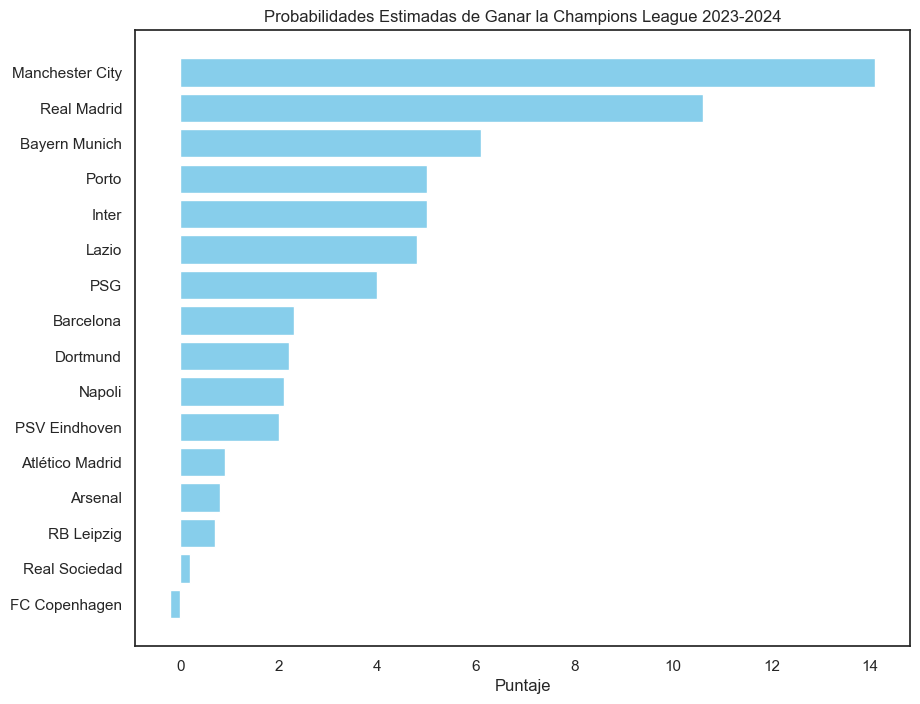

In [83]:
# Extraer nombres de equipos y sus puntajes para la gráfica
equipos = [equipo[0] for equipo in puntajes_ordenados]
puntajes_equipo = [puntaje[1] for puntaje in puntajes_ordenados]

# Crear gráfica
plt.figure(figsize=(10, 8))
plt.barh(equipos, puntajes_equipo, color='skyblue')
plt.xlabel('Puntaje')
plt.title('Probabilidades Estimadas de Ganar la Champions League 2023-2024')
plt.gca().invert_yaxis()  # Invertir para que el equipo con mayor puntaje esté arriba
plt.show()

Gráfica que representa las probabilidades estimadas de ganar la Champions League 2023-2024 para los 16 equipos basadas en combinar los resultados de los partidos de ida de octavos de final, el rendimiento histórico en la competición, y el éxito reciente en las últimas temporadas de la Champions League.

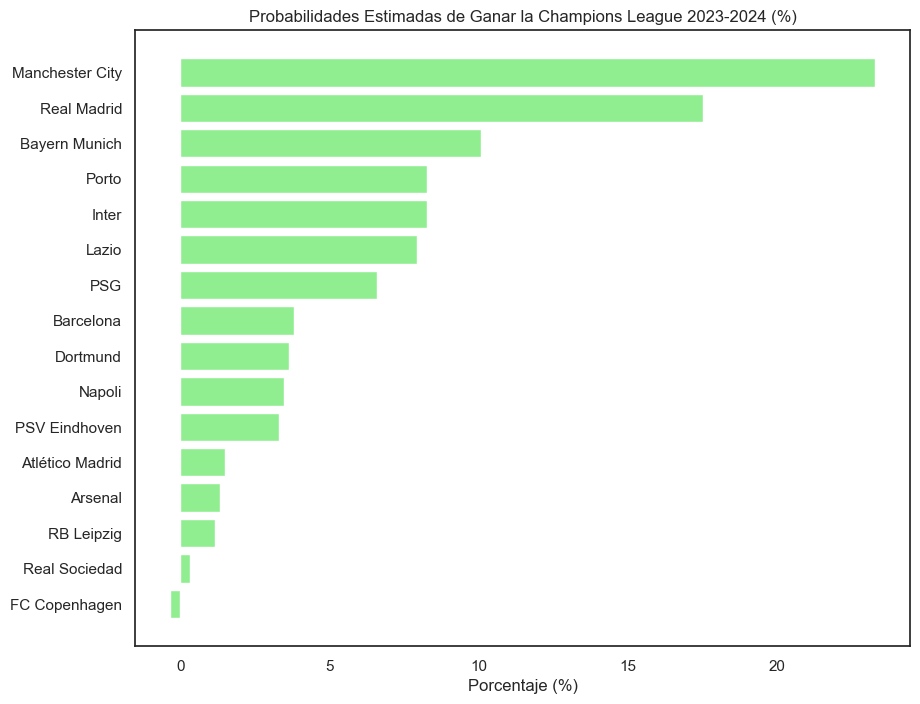

In [85]:
# Lo mismo en %
total_puntos = sum(puntajes_equipo)

# Convertir a porcentajes
porcentajes_equipo = [(puntaje / total_puntos) * 100 for puntaje in puntajes_equipo]
porcentajes_equipo
# Crear gráfica de porcentajes
plt.figure(figsize=(10, 8))
plt.barh(equipos, porcentajes_equipo, color='lightgreen')
plt.xlabel('Porcentaje (%)')
plt.title('Probabilidades Estimadas de Ganar la Champions League 2023-2024 (%)')
plt.gca().invert_yaxis()  # Invertir para que el equipo con mayor porcentaje esté arriba
plt.show()


In [89]:
total_puntos = sum(puntajes_equipo)

# Convertir a porcentajes
porcentajes_equipo = [(puntaje / total_puntos) * 100 for puntaje in puntajes_equipo]
print("Porcentajes de los equipos:")
for equipo, porcentaje in zip(equipos, porcentajes_equipo):
    print(f"{equipo}: {porcentaje:.2f}%")


Porcentajes de los equipos:
Manchester City: 23.27%
Real Madrid: 17.49%
Bayern Munich: 10.07%
Porto: 8.25%
Inter: 8.25%
Lazio: 7.92%
PSG: 6.60%
Barcelona: 3.80%
Dortmund: 3.63%
Napoli: 3.47%
PSV Eindhoven: 3.30%
Atlético Madrid: 1.49%
Arsenal: 1.32%
RB Leipzig: 1.16%
Real Sociedad: 0.33%
FC Copenhagen: -0.33%
